<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap07/7_1_Backpropagation_in_Toy_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 7.1: Backpropagation in Toy Model**

This notebook computes the derivatives of the toy function discussed in section 7.3 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

We're going to investigate how to take the derivatives of functions where one operation is composed with another, which is composed with a third and so on.  For example, consider the model:

\begin{equation}
     \text{f}[x,\boldsymbol\phi] = \beta_3+\omega_3\cdot\cos\Bigl[\beta_2+\omega_2\cdot\exp\bigl[\beta_1+\omega_1\cdot\sin[\beta_0+\omega_0x]\bigr]\Bigr],
\end{equation}

with parameters $\boldsymbol\phi=\{\beta_0,\omega_0,\beta_1,\omega_1,\beta_2,\omega_2,\beta_3,\omega_3\}$.<br>

This is a composition of the functions $\cos[\bullet],\exp[\bullet],\sin[\bullet]$.   I chose these just because you probably already know the derivatives of these functions:

\begin{align}
 \frac{\partial \cos[z]}{\partial z} = -\sin[z] \quad\quad \frac{\partial \exp[z]}{\partial z} = \exp[z] \quad\quad \frac{\partial \sin[z]}{\partial z} = \cos[z].
\end{align}

Suppose that we have a least squares loss function:

\begin{equation*}
\ell_i = (\text{f}[x_i,\boldsymbol\phi]-y_i)^2,
\end{equation*}

Assume that we know the current values of $\beta_{0},\beta_{1},\beta_{2},\beta_{3},\omega_{0},\omega_{1},\omega_{2},\omega_{3}$, $x_i$ and $y_i$. We could obviously calculate $\ell_i$.   But we also want to know how $\ell_i$ changes when we make a small change to $\beta_{0},\beta_{1},\beta_{2},\beta_{3},\omega_{0},\omega_{1},\omega_{2}$, or $\omega_{3}$.  In other words, we want to compute the eight derivatives:

\begin{align}
\frac{\partial \ell_i}{\partial \beta_{0}}, \quad \frac{\partial \ell_i}{\partial \beta_{1}}, \quad \frac{\partial \ell_i}{\partial \beta_{2}}, \quad \frac{\partial \ell_i }{\partial \beta_{3}},  \quad \frac{\partial \ell_i}{\partial \omega_{0}}, \quad \frac{\partial \ell_i}{\partial \omega_{1}}, \quad \frac{\partial \ell_i}{\partial \omega_{2}},  \quad\text{and} \quad \frac{\partial \ell_i}{\partial \omega_{3}}.
\end{align}

In [1]:
# import library
import numpy as np

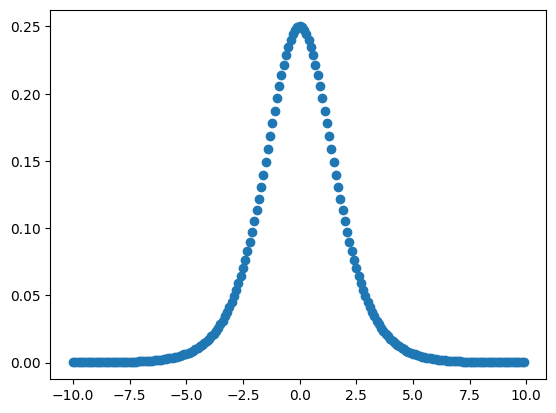

In [4]:
a = np.arange(-10, 10, 0.1)
y = (1/(1+np.exp(-a))) * (1 - (1/(1+np.exp(-a))))
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.scatter(a, y)

Let's first define the original function for $y$ and the loss term:

In [2]:
def fn(x, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3):
  return beta3+omega3 * np.cos(beta2 + omega2 * np.exp(beta1 + omega1 * np.sin(beta0 + omega0 * x)))

def loss(x, y, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3):
  diff = fn(x, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3) - y
  return diff * diff

Now we'll choose some values for the betas and the omegas and x and compute the output of the function:

In [3]:
beta0 = 1.0; beta1 = 2.0; beta2 = -3.0; beta3 = 0.4
omega0 = 0.1; omega1 = -0.4; omega2 = 2.0; omega3 = 3.0
x = 2.3; y = 2.0
l_i_func = loss(x,y,beta0,beta1,beta2,beta3,omega0,omega1,omega2,omega3)
print('l_i=%3.3f'%l_i_func)

l_i=0.139


# Computing derivatives by hand

We could compute expressions for the derivatives by hand and write code to compute them directly but some have very complex expressions, even for this relatively simple original equation. For example:

\begin{align}
\frac{\partial \ell_i}{\partial \omega_{0}} &=& -2 \left( \beta_3+\omega_3\cdot\cos\Bigl[\beta_2+\omega_2\cdot\exp\bigl[\beta_1+\omega_1\cdot\sin[\beta_0+\omega_0\cdot x_i]\bigr]\Bigr]-y_i\right)\nonumber \\
&&\hspace{0.5cm}\cdot \omega_1\omega_2\omega_3\cdot x_i\cdot\cos[\beta_0+\omega_0 \cdot x_i]\cdot\exp\Bigl[\beta_1 + \omega_1 \cdot \sin[\beta_0+\omega_0\cdot x_i]\Bigr]\nonumber\\
&& \hspace{1cm}\cdot \sin\biggl[\beta_2+\omega_2\cdot \exp\Bigl[\beta_1 + \omega_1 \cdot \sin[\beta_0+\omega_0\cdot x_i]\Bigr]\biggr].
\end{align}

In [4]:
dldbeta3_func = 2 * (beta3 +omega3 * np.cos(beta2 + omega2 * np.exp(beta1+omega1 * np.sin(beta0+omega0 * x)))-y)
dldomega0_func = -2 *(beta3 +omega3 * np.cos(beta2 + omega2 * np.exp(beta1+omega1 * np.sin(beta0+omega0 * x)))-y) * \
              omega1 * omega2 * omega3 * x * np.cos(beta0 + omega0 * x) * np.exp(beta1 +omega1 * np.sin(beta0 + omega0 * x)) *\
              np.sin(beta2 + omega2 * np.exp(beta1+ omega1* np.sin(beta0+omega0 * x)))

Let's make sure this is correct using finite differences:

In [5]:
dldomega0_fd = (loss(x,y,beta0,beta1,beta2,beta3,omega0+0.00001,omega1,omega2,omega3)-loss(x,y,beta0,beta1,beta2,beta3,omega0,omega1,omega2,omega3))/0.00001

print('dydomega0: Function value = %3.3f, Finite difference value = %3.3f'%(dldomega0_func,dldomega0_fd))

dydomega0: Function value = 5.246, Finite difference value = 5.246


The code to calculate $\partial l_i/ \partial \omega_0$ is a bit of a nightmare.  It's easy to make mistakes, and you can see that some parts of it are repeated (for example, the $\sin[\bullet]$ term), which suggests some kind of redundancy in the calculations.  The goal of this practical is to compute the derivatives in a much simpler way.  There will be three steps:

**Step 1:** Write the original equations as a series of intermediate calculations.

\begin{align}
f_{0} &=& \beta_{0} + \omega_{0} x_i\nonumber\\
h_{1} &=& \sin[f_{0}]\nonumber\\
f_{1} &=& \beta_{1} + \omega_{1}h_{1}\nonumber\\
h_{2} &=& \exp[f_{1}]\nonumber\\
f_{2} &=& \beta_{2} + \omega_{2} h_{2}\nonumber\\
h_{3} &=& \cos[f_{2}]\nonumber\\
f_{3} &=& \beta_{3} + \omega_{3}h_{3}\nonumber\\
l_i &=& (f_3-y_i)^2
\end{align}

and compute and store the values of all of these intermediate values.  We'll need them to compute the derivatives.<br>  This is called the **forward pass**.

In [6]:
# TODO compute all the f_k and h_k terms
# Replace the code below

f0 = beta0 + omega0 * x
h1 = np.sin(f0)
f1 = beta1 + omega1 * h1
h2 = np.exp(f1)
f2 = beta2 + omega2 * h2
h3 = np.cos(f2)
f3 = beta3 + omega3 * h3
l_i = np.pow(f3 - y, 2) 


In [7]:
# Let's check we got that right:
print("f0: true value = %3.3f, your value = %3.3f"%(1.230, f0))
print("h1: true value = %3.3f, your value = %3.3f"%(0.942, h1))
print("f1: true value = %3.3f, your value = %3.3f"%(1.623, f1))
print("h2: true value = %3.3f, your value = %3.3f"%(5.068, h2))
print("f2: true value = %3.3f, your value = %3.3f"%(7.137, f2))
print("h3: true value = %3.3f, your value = %3.3f"%(0.657, h3))
print("f3: true value = %3.3f, your value = %3.3f"%(2.372, f3))
print("l_i original = %3.3f, l_i from forward pass = %3.3f"%(l_i_func, l_i))


f0: true value = 1.230, your value = 1.230
h1: true value = 0.942, your value = 0.942
f1: true value = 1.623, your value = 1.623
h2: true value = 5.068, your value = 5.068
f2: true value = 7.137, your value = 7.137
h3: true value = 0.657, your value = 0.657
f3: true value = 2.372, your value = 2.372
l_i original = 0.139, l_i from forward pass = 0.139


**Step 2:** Compute the derivatives of $\ell_i$ with respect to the intermediate quantities that we just calculated, but in reverse order:

\begin{align}
\quad \frac{\partial \ell_i}{\partial f_3}, \quad \frac{\partial \ell_i}{\partial h_3}, \quad \frac{\partial \ell_i}{\partial f_2}, \quad
\frac{\partial \ell_i}{\partial h_2}, \quad \frac{\partial \ell_i}{\partial f_1}, \quad \frac{\partial \ell_i}{\partial h_1},  \quad\text{and} \quad \frac{\partial \ell_i}{\partial f_0}.
\end{align}

The first of these derivatives is straightforward:

\begin{equation}
\frac{\partial \ell_i}{\partial f_{3}} = 2 (f_3-y).
\end{equation}

The second derivative can be calculated using the chain rule:

\begin{equation}
\frac{\partial \ell_i}{\partial h_{3}} =\frac{\partial f_{3}}{\partial h_{3}} \frac{\partial \ell_i}{\partial f_{3}} .
\end{equation}

The left-hand side asks how $\ell_i$ changes when $h_{3}$ changes.  The right-hand side says we can decompose this into (i) how $\ell_i$ changes when $f_{3}$ changes and how $f_{3}$ changes when $h_{3}$ changes.  So you get a chain of events happening:  $h_{3}$ changes $f_{3}$, which changes $\ell_i$, and the derivatives represent the effects of this chain.  Notice that we computed the first of these derivatives already and is  $2 (f_3-y)$. We calculated $f_{3}$ in step 1.  The second term is the derivative of $\beta_{3} + \omega_{3}h_{3}$ with respect to $h_3$ which is simply $\omega_3$.  

We can continue in this way, computing the derivatives of the output with respect to these intermediate quantities:

\begin{align}
\frac{\partial \ell_i}{\partial f_{2}} &=& \frac{\partial h_{3}}{\partial f_{2}}\left(
\frac{\partial f_{3}}{\partial h_{3}}\frac{\partial \ell_i}{\partial f_{3}} \right)
\nonumber \\
\frac{\partial \ell_i}{\partial h_{2}} &=& \frac{\partial f_{2}}{\partial h_{2}}\left(\frac{\partial h_{3}}{\partial f_{2}}\frac{\partial f_{3}}{\partial h_{3}}\frac{\partial \ell_i}{\partial f_{3}}\right)\nonumber \\
\frac{\partial \ell_i}{\partial f_{1}} &=& \frac{\partial h_{2}}{\partial f_{1}}\left( \frac{\partial f_{2}}{\partial h_{2}}\frac{\partial h_{3}}{\partial f_{2}}\frac{\partial f_{3}}{\partial h_{3}}\frac{\partial \ell_i}{\partial f_{3}} \right)\nonumber \\
\frac{\partial \ell_i}{\partial h_{1}} &=& \frac{\partial f_{1}}{\partial h_{1}}\left(\frac{\partial h_{2}}{\partial f_{1}} \frac{\partial f_{2}}{\partial h_{2}}\frac{\partial h_{3}}{\partial f_{2}}\frac{\partial f_{3}}{\partial h_{3}}\frac{\partial \ell_i}{\partial f_{3}} \right)\nonumber \\
\frac{\partial \ell_i}{\partial f_{0}} &=& \frac{\partial h_{1}}{\partial f_{0}}\left(\frac{\partial f_{1}}{\partial h_{1}}\frac{\partial h_{2}}{\partial f_{1}} \frac{\partial f_{2}}{\partial h_{2}}\frac{\partial h_{3}}{\partial f_{2}}\frac{\partial f_{3}}{\partial h_{3}}\frac{\partial \ell_i}{\partial f_{3}} \right).
\end{align}

In each case, we have already computed all of the terms except the last one in the previous step, and the last term is simple to evaluate.  This is called the **backward pass**.

In [8]:
# TODO -- Compute the derivatives of the output with respect
# to the intermediate computations h_k and f_k (i.e, run the backward pass)
# I've done the first two for you.  You replace the code below:
dldf3 = 2 * (f3 - y)
dldh3 = omega3 * dldf3
# Replace the code below
dldf2 = -1 * np.sin(f2) * dldh3
dldh2 = omega2 * dldf2
dldf1 = np.exp(f1) * dldh2
dldh1 = omega1 * dldf1
dldf0 = np.cos(f0) * dldh1


In [9]:
# Let's check we got that right
print("dldf3: true value = %3.3f, your value = %3.3f"%(0.745, dldf3))
print("dldh3: true value = %3.3f, your value = %3.3f"%(2.234, dldh3))
print("dldf2: true value = %3.3f, your value = %3.3f"%(-1.683, dldf2))
print("dldh2: true value = %3.3f, your value = %3.3f"%(-3.366, dldh2))
print("dldf1: true value = %3.3f, your value = %3.3f"%(-17.060, dldf1))
print("dldh1: true value = %3.3f, your value = %3.3f"%(6.824, dldh1))
print("dldf0: true value = %3.3f, your value = %3.3f"%(2.281, dldf0))

dldf3: true value = 0.745, your value = 0.745
dldh3: true value = 2.234, your value = 2.234
dldf2: true value = -1.683, your value = -1.683
dldh2: true value = -3.366, your value = -3.366
dldf1: true value = -17.060, your value = -17.060
dldh1: true value = 6.824, your value = 6.824
dldf0: true value = 2.281, your value = 2.281


In [10]:
# TODO -- Calculate the final derivatives with respect to the beta and omega terms

dldbeta3 = 1
dldomega3 = dldf3 * h3
dldbeta2 = dldf2 * 1
dldomega2 = dldf2 * h2
dldbeta1 = dldf1 * 1
dldomega1 = dldf1 * h1
dldbeta0 = dldf0 * 1
dldomega0 = dldf0 * x


In [11]:
# Let's check we got them right
print('dldbeta3: Your value = %3.3f, True value = %3.3f'%(dldbeta3, 0.745))
print('dldomega3: Your value = %3.3f, True value = %3.3f'%(dldomega3, 0.489))
print('dldbeta2: Your value = %3.3f, True value = %3.3f'%(dldbeta2, -1.683))
print('dldomega2: Your value = %3.3f, True value = %3.3f'%(dldomega2, -8.530))
print('dldbeta1: Your value = %3.3f, True value = %3.3f'%(dldbeta1, -17.060))
print('dldomega1: Your value = %3.3f, True value = %3.3f'%(dldomega1, -16.079))
print('dldbeta0: Your value = %3.3f, True value = %3.3f'%(dldbeta0, 2.281))
print('dldomega0: Your value = %3.3f, Function value = %3.3f, Finite difference value = %3.3f'%(dldomega0, dldomega0_func, dldomega0_fd))

dldbeta3: Your value = 1.000, True value = 0.745
dldomega3: Your value = 0.489, True value = 0.489
dldbeta2: Your value = -1.683, True value = -1.683
dldomega2: Your value = -8.530, True value = -8.530
dldbeta1: Your value = -17.060, True value = -17.060
dldomega1: Your value = -16.079, True value = -16.079
dldbeta0: Your value = 2.281, True value = 2.281
dldomega0: Your value = 5.246, Function value = 5.246, Finite difference value = 5.246


Using this method, we can compute the derivatives quite easily without needing to compute very complicated expressions.  In the next practical, we'll apply this same method to a deep neural network.